<a href="https://colab.research.google.com/github/RodgersNdocha/Machine-learning-Tutorial-for-beginners/blob/main/TENSORFLOW_FOR_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#creating a simple neural network.
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])

In [ ]:
model.compile(optimizer="sgd", loss = 'mean_squared_error')

In [ ]:
#Generating our data for the use. we can use the bellow data
import numpy as np
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
model.fit(xs, ys, epochs=500)
print(model.predict([10,0]))

Epoch 1/500
1/1 [==============================] - 0s 456ms/step - loss: 30.8611
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 24.5966
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 19.6616
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 15.7726
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 12.7066
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 10.2884
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 8.3798
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 6.8724
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 5.6807
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 4.7375
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 3.9900
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 3.3964
Epoch 13/500
1/1 [===========================

In [ ]:
#forming the data for the house prediction
def house_model(y_new):
  xs = []
  ys = []
  for i in range(1,10):
    xs.append(i)
    ys.append((1+float(i))*50)
  xs=np.array(xs, dtype=float)
  ys=np.array(ys, dtype=float)

#form the neural network that will predict the house prices
  model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])
  model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
  model.fit(xs,ys, epochs = 4500)
  return(model.predict(y_new)[0]/100)

In [10]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [7]:
#Building a program for identifying images
import tensorflow as tf
from tensorflow import keras

In [21]:
fashion_mnist  =  keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
#Creating the model with the three layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

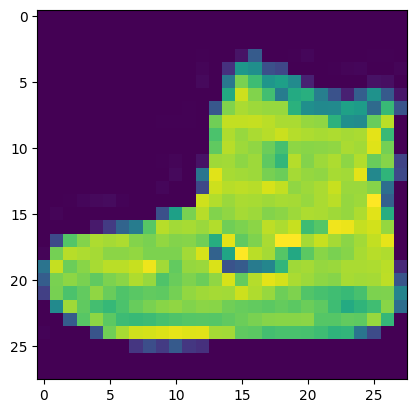

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [16]:
training_images  = train_images / 255.0
test_images = test_images / 255.0

In [27]:
from keras.api._v2.keras import metrics
model.compile( optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.99):
                print("/nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

In [30]:
callbacks = myCallback()
model.fit(train_images, train_labels, epochs = 10, callbacks = [callbacks] )

Epoch 1/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7976

TypeError: ignored